In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
# リスト 8-1-(1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

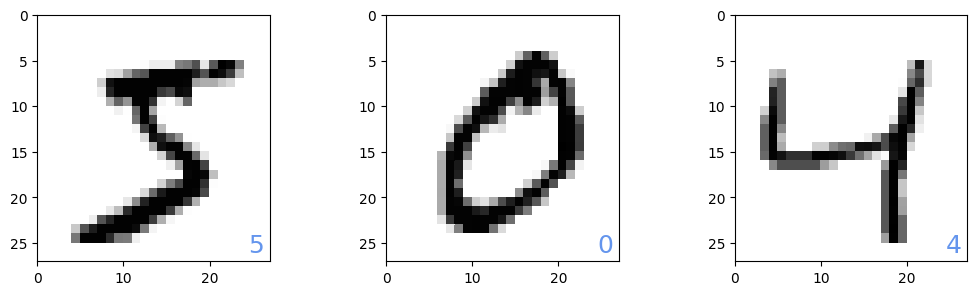

In [ ]:
# リスト 8-1-(2)

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
    plt.subplot(1, 3, id+1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)

plt.show()

In [ ]:
# リスト 8-1-(3)

x_train = x_train.reshape(60000, 784)   # (A)
x_train = x_train.astype('float32')     # (B)
x_train /= 255                          # (C)
num_classes = 10
y_train = to_categorical(y_train, num_classes)    # (D)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test, num_classes)

In [ ]:
# リスト 8-1-(4)

np.random.seed(1)                                                                         # (A)

model = Sequential()                                                                      # (B)
model.add(Dense(16, input_dim=784, activation='sigmoid'))                                 # (C)
model.add(Dense(10, activation='softmax'))                                                # (D)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])    # (E)

In [ ]:
# リスト 8-1-(5)

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))  # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2886 - loss: 2.1379 - val_accuracy: 0.5992 - val_loss: 1.7017
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6384 - loss: 1.6227 - val_accuracy: 0.7464 - val_loss: 1.3653
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7546 - loss: 1.3106 - val_accuracy: 0.8062 - val_loss: 1.1204
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8026 - loss: 1.0867 - val_accuracy: 0.8336 - val_loss: 0.9428
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8292 - loss: 0.9204 - val_accuracy: 0.8469 - val_loss: 0.8143
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8417 - loss: 0.8025 - val_accuracy: 0.8581 - val_loss: 0.7201
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8515 - loss: 0.7134 - val_accuracy: 0.8660 - val_loss: 0.6486
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8624 - loss: 0.6444 - val_accuracy: 0.8726 - val_loss:

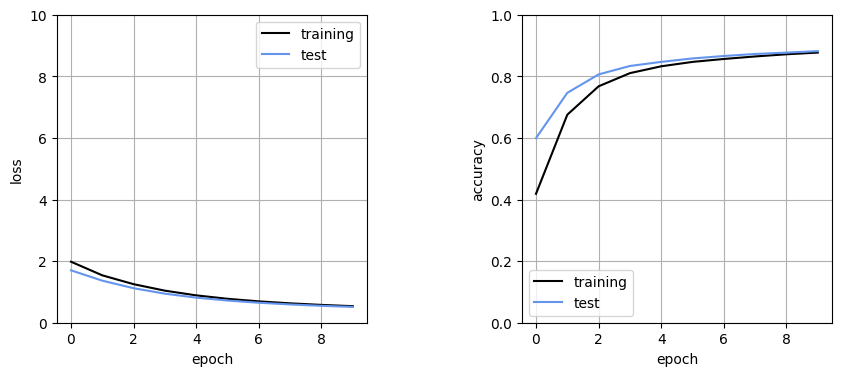

In [ ]:
# リスト 8-1-(6)

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


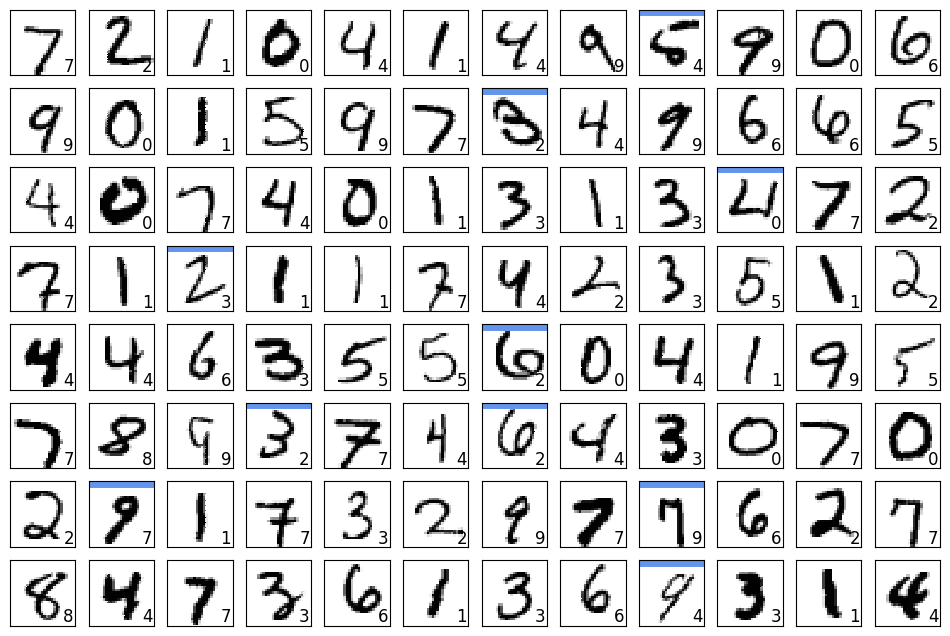

In [ ]:
# リスト 8-1-(7)

def show_prediction():
    n_show = 96
    y = model.predict(x_test)   # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

# メイン
show_prediction()
plt.show()

In [ ]:
# リスト 8-1-(8)

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))                                 # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:3f} sec".format(time.time() - startTime))

Epoch 1/10


c:\Users\monji\machine_learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3907 - loss: 1.8909 - val_accuracy: 0.8235 - val_loss: 0.8002
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8414 - loss: 0.6973 - val_accuracy: 0.8832 - val_loss: 0.4635
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8798 - loss: 0.4551 - val_accuracy: 0.9001 - val_loss: 0.3757
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9006 - loss: 0.3679 - val_accuracy: 0.9097 - val_loss: 0.3323
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9073 - loss: 0.3363 - val_accuracy: 0.9152 - val_loss: 0.3067
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9127 - loss: 0.3122 - val_accuracy: 0.9196 - val_loss: 0.2883
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9202 - loss: 0.2895 - val_accuracy: 0.9241 - val_loss: 0.2754
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9216 - loss: 0.2789 - val_accuracy: 0.9246 - val_loss: 0.2662
Epo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


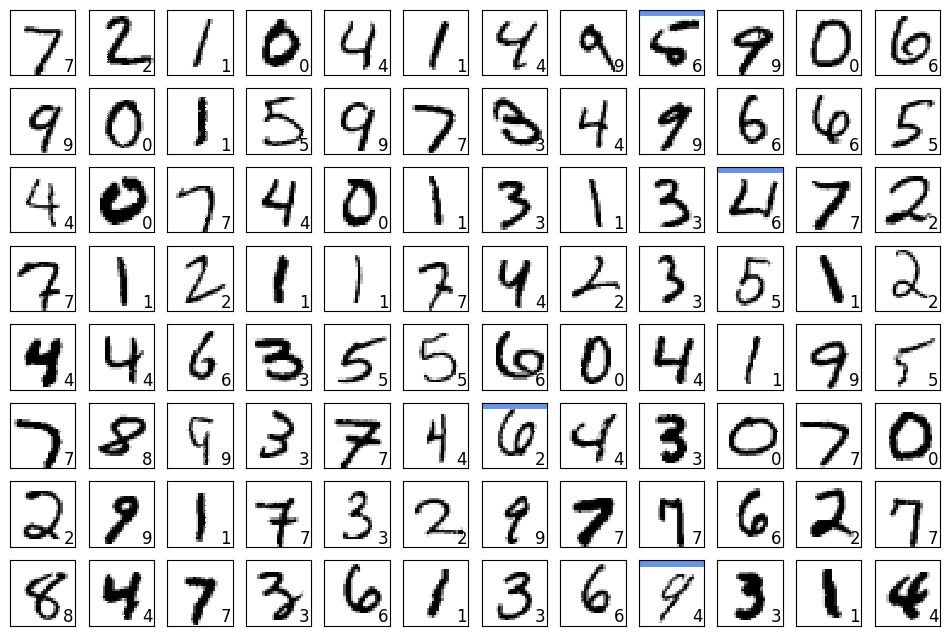

In [ ]:
# リスト 8-1-(9)

show_prediction()
plt.show()

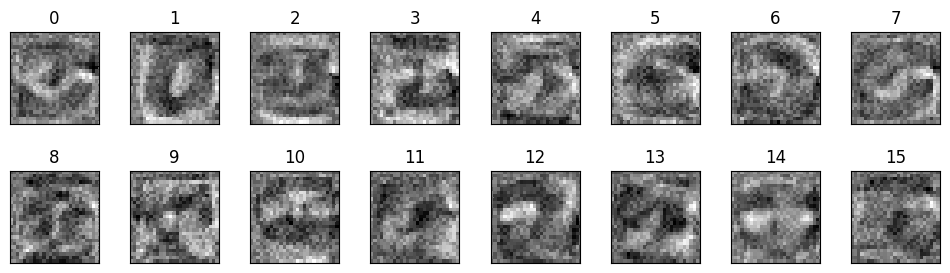

In [ ]:
# リスト 8-1-(10)

# 1層目の重みの視覚化
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i+1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)

plt.show()